#**Dowload data**

4 emotion + unknow >>
https://drive.google.com/file/d/1ik2O705AOnVi_MtoWDQ9JgZ5kgaENqVQ/view?usp=share_link


#**Model**

**Import**

In [ ]:
!pip install torch
!pip install -Uqq fastbook
import fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
! unzip /content/gdrive/MyDrive/doemotion/dogemotion-data-final-5categories.zip

In [ ]:
from fastbook import *
from google.colab import files
from IPython.display import Image
from IPython.display import HTML

**DataBlock**

In [ ]:
path = Path('/content/dogemotion-data-final-5categories')

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files, 
    splitter=GrandparentSplitter(), 
    get_y=parent_label, 
    item_tfms=Resize(224, method=ResizeMethod.Pad), 
    batch_tfms=aug_transforms()
    )
dls = dblock.dataloaders(path, bs=64)

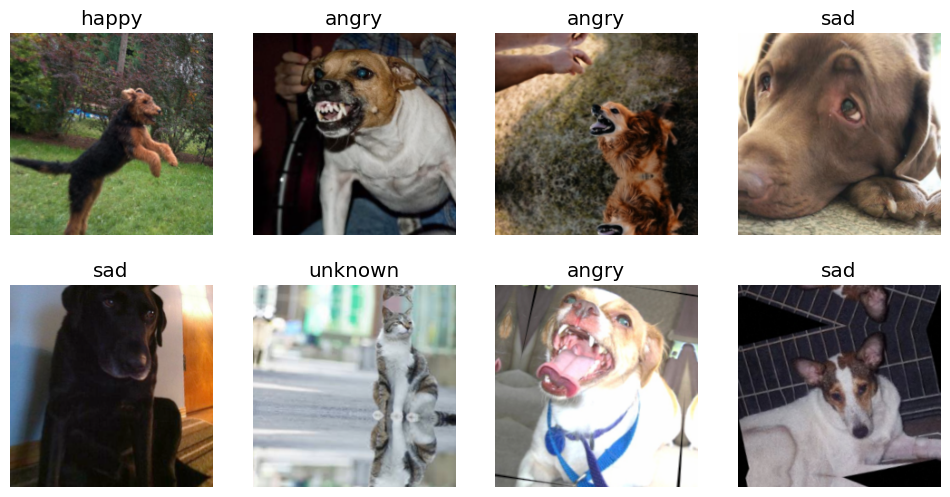

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

**train**

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.526326,0.830922,0.682222,0.317778,00:53


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.844800,0.595887,0.777778,0.222222,00:48
1,0.602230,0.516153,0.826667,0.173333,00:51
2,0.447289,0.592327,0.844444,0.155556,00:48
3,0.320972,0.465450,0.846667,0.153333,00:48
4,0.234631,0.472892,0.860000,0.140000,00:48
5,0.166476,0.490746,0.877778,0.122222,00:48
6,0.116040,0.505162,0.882222,0.117778,00:51
7,0.076740,0.481638,0.886667,0.113333,00:48
8,0.050725,0.485270,0.891111,0.108889,00:51
9,0.043727,0.474121,0.888889,0.111111,00:49


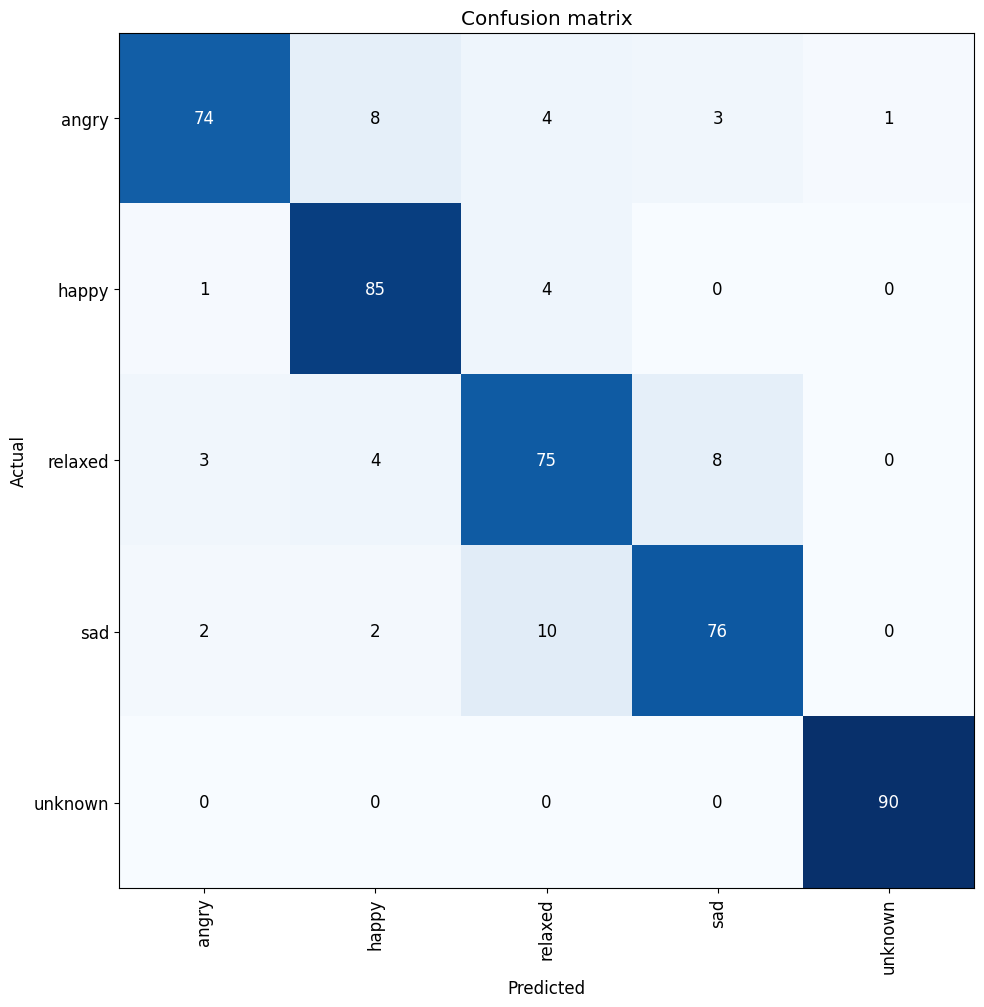

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

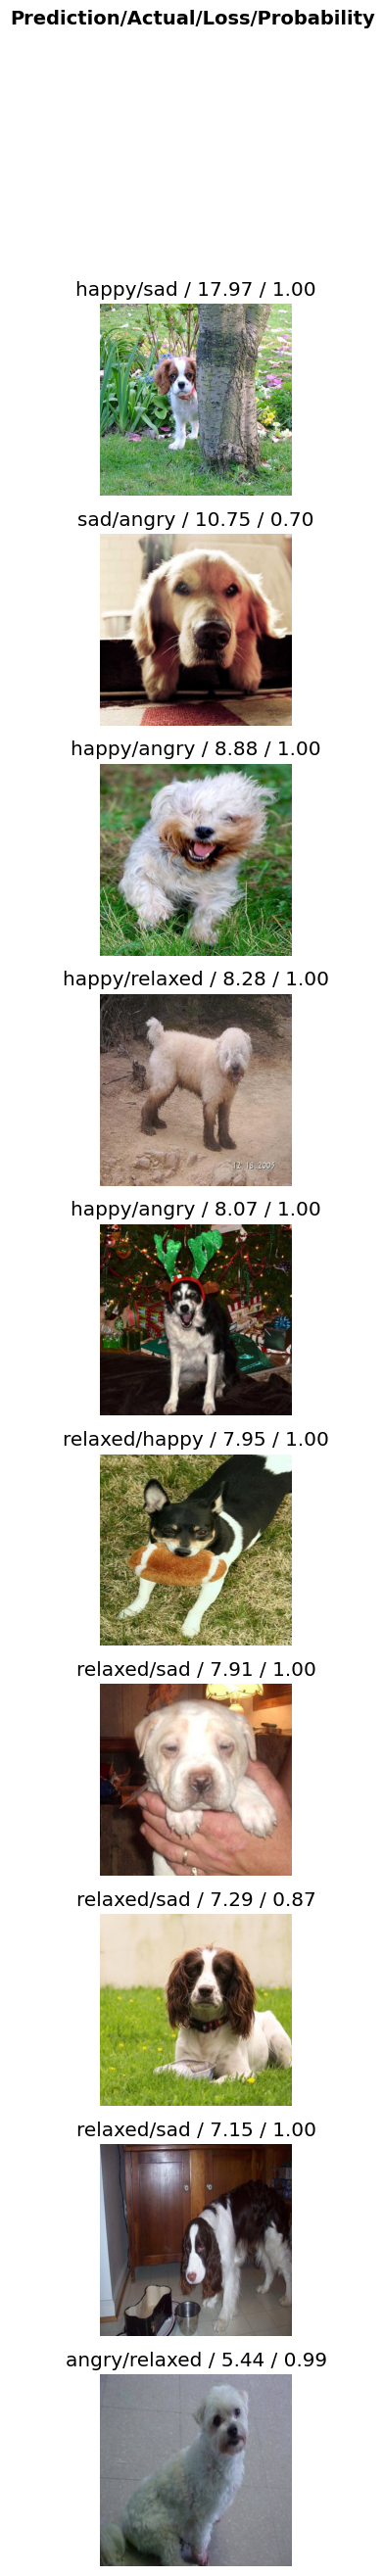

In [ ]:
interp.plot_top_losses(10, nrows=10)

**save model**

In [ ]:
learn.save('model')

Path('models/model.pth')

In [ ]:
exportfilename='dogemotion-model-5-final.pkl'
learn.export(exportfilename)
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('dogemotion-model-5-final.pkl')]

**Test set**

In [ ]:
dblock2 = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files, 
    splitter=GrandparentSplitter(valid_name='test'),
    get_y=parent_label, 
    item_tfms=Resize(224, method=ResizeMethod.Squish), 
    batch_tfms=aug_transforms()
    )
dls2 = dblock2.dataloaders(path, bs=64) 

In [ ]:
learn = cnn_learner(dls2, resnet34, metrics=error_rate).to_fp16()
learn.load('model');

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


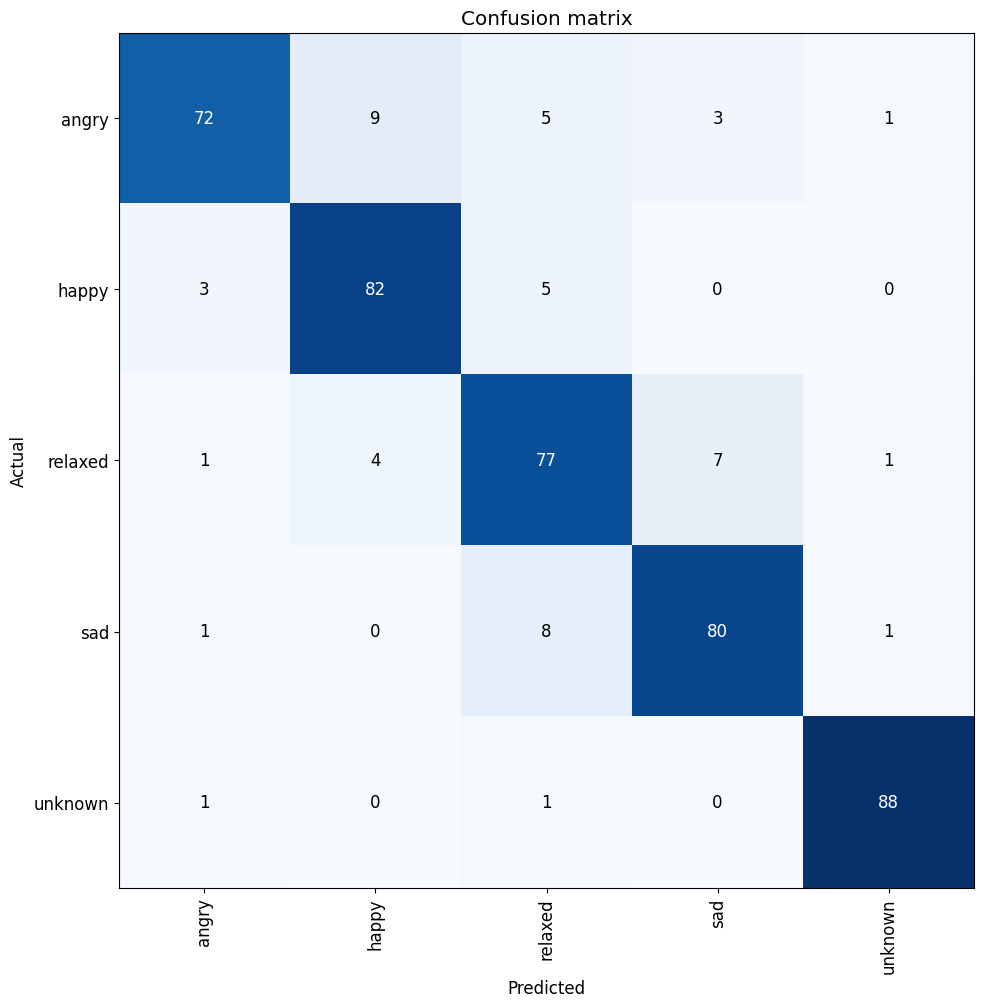

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

In [ ]:
interp.print_classification_report() 

              precision    recall  f1-score   support

       angry       0.92      0.80      0.86        90
       happy       0.86      0.91      0.89        90
     relaxed       0.80      0.86      0.83        90
         sad       0.89      0.89      0.89        90
     unknown       0.97      0.98      0.97        90

    accuracy                           0.89       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.89      0.89      0.89       450

